In [1]:
import torch
import numpy as np
torch.__version__
torch.manual_seed(seed=1999) # for getting same results

# Tensors
Tensors are actually quite complicated in their essence. They have a rich geometrical interpretation regarding linear algebra. 

In ML both matrices and tensors are used interchangiably despite of the fact that __they are not the same thing__

## Intro to Tensors in Pytorch

In [2]:
scalar = torch.tensor(5) # zero dimensional tensor
scalar

tensor(5)

In [3]:
scalar.ndim # tensor's dimension

0

In [4]:
scalar.item() # retrieve number inside scalar tensor

5

In [5]:
scalar.shape

torch.Size([])

In [6]:
vector = torch.tensor([1,2])
vector, vector.ndim

(tensor([1, 2]), 1)

A non-theory-based trick to check how many dimensions a tensor has is to count all the open square brackets ([). In the case of a scalar, it has none and for the vector, it has one. So, dimensions are 0 and 1 respectively

In [7]:
vector.shape

torch.Size([2])

In [8]:
MATRIX = torch.tensor([[1,2],[2,8]])
MATRIX, MATRIX.ndim, MATRIX.shape

(tensor([[1, 2],
         [2, 8]]),
 2,
 torch.Size([2, 2]))

In [9]:
TENSOR = torch.tensor([[[1,2,3],
                        [4,5,6],
                        [7,8,9]
                        ]])
TENSOR, TENSOR.ndim, TENSOR.shape

(tensor([[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]]),
 3,
 torch.Size([1, 3, 3]))

In this case, tensor.ndim is torch.Size([1, 3, 3]) which means that the first bracket has 1 element, the second has 3 elements and each of the three have 3 numbers each. It goes from outermost to innermost bracket.

By the way, it's a common convention to use uppercase letters and names for tensors and matrices, and lowercase ones for vectors and scalars.

To sum it all up

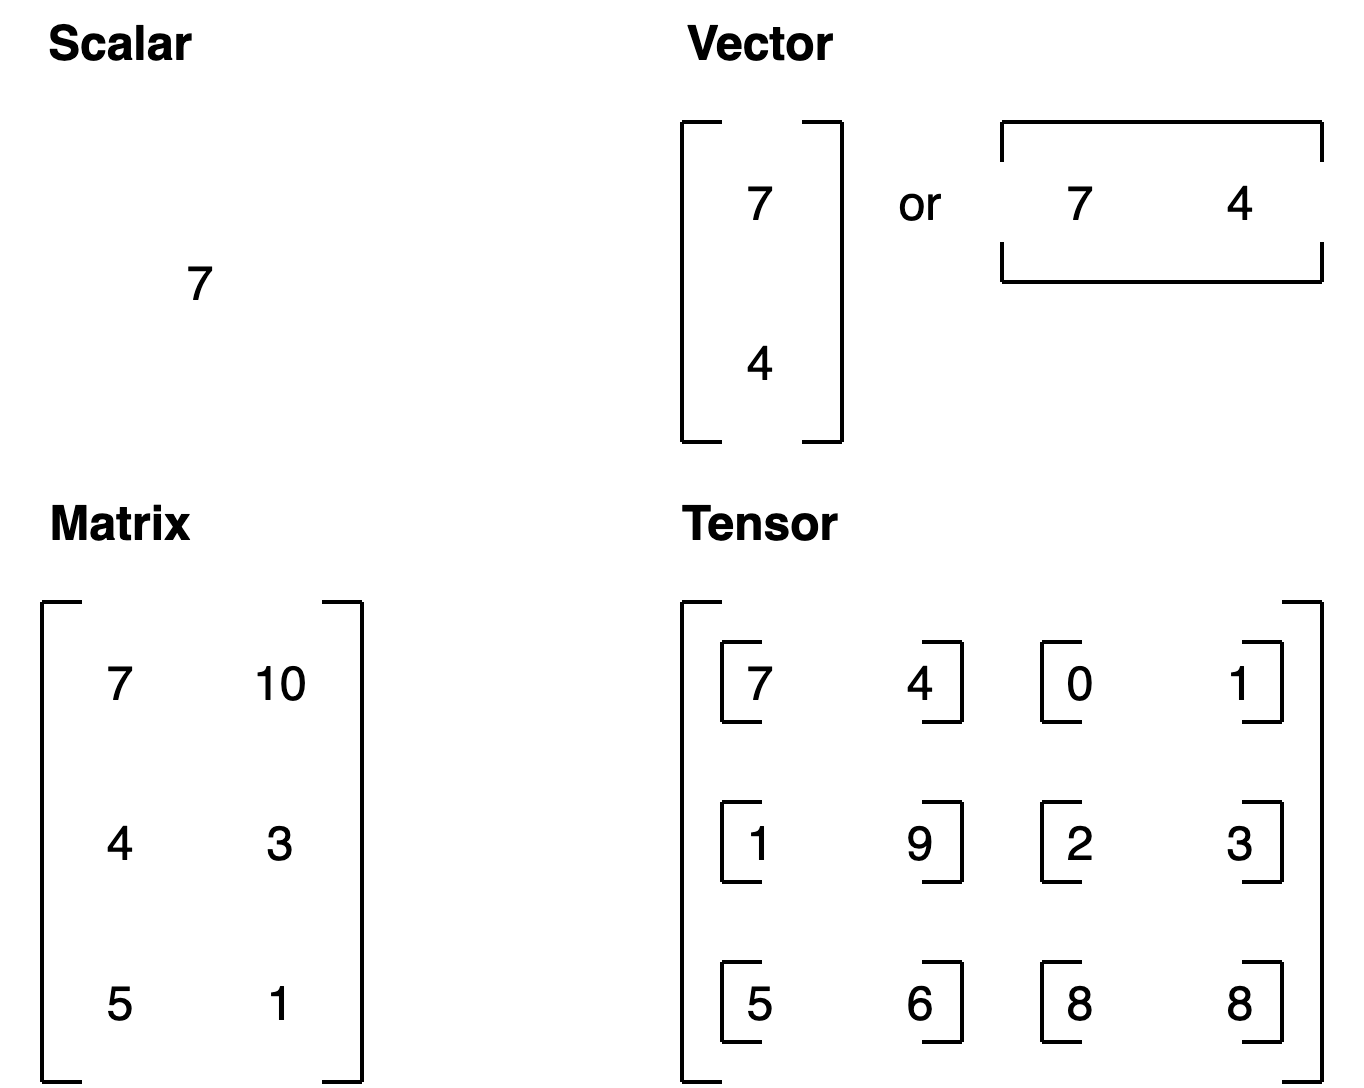

taken from https://www.learnpytorch.io/00_pytorch_fundamentals/

In [10]:
# Random tensors: Useful for model initialization

A = torch.rand(size=(4,3,3))
A, A.ndim

(tensor([[[0.0772, 0.3799, 0.0644],
          [0.5970, 0.6450, 0.8595],
          [0.8296, 0.0562, 0.8737]],
 
         [[0.8191, 0.0460, 0.9423],
          [0.2155, 0.6306, 0.2609],
          [0.8080, 0.1262, 0.7441]],
 
         [[0.5295, 0.3941, 0.6876],
          [0.5675, 0.1722, 0.4366],
          [0.4988, 0.1948, 0.0838]],
 
         [[0.6210, 0.1976, 0.7475],
          [0.8613, 0.5317, 0.2480],
          [0.6738, 0.6330, 0.6220]]]),
 3)

In [11]:
B = torch.zeros(size=(3,3))
B, B.ndim

(tensor([[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]),
 2)

In [12]:
C = torch.ones(size=(3,4,4))
C, C.ndim, C.dtype

(tensor([[[1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.]],
 
         [[1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.]],
 
         [[1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.]]]),
 3,
 torch.float32)

In [13]:
# vector with range

range_v = torch.arange(start=0, end=10, step=1)
range_v, range_v.ndim, range_v.dtype

(tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), 1, torch.int64)

In [14]:
# copying shape with zeroes_like or ones_like

range_zeroes = torch.zeros_like(input=range_v)
range_zeroes, range_zeroes.ndim, range_zeroes.dtype

(tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 1, torch.int64)

In [15]:
range_ones = torch.ones_like(input=range_v)
range_ones, range_ones.ndim, range_ones.dtype

(tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), 1, torch.int64)

## Numpy arrays - Pytorch tensors

In [16]:
np_array = np.arange(3)
tensor = torch.from_numpy(np_array)
tensor.numpy(), tensor

(array([0, 1, 2]), tensor([0, 1, 2]))

## Tensors Datatypes

There are many datatypes for tensors. Some are more suited for CPU calculations, some others for GPU (CUDA which is Nvdias's tool) and there are also different tensors for the types of numbers in them: integer (int), float (float) ... and their precision (how many digits we are using to describe them) int32, float64, ...

In [17]:
float_32_tensor = torch.tensor([3.0, 6.0, 9.0],
                               dtype=None, # defaults to None, which is torch.float32 or whatever datatype is passed
                               device=None, # defaults to None, which uses the default tensor type
                               requires_grad=False) # if True, operations performed on the tensor are recorded 

float_32_tensor.shape, float_32_tensor.dtype, float_32_tensor.device

(torch.Size([3]), torch.float32, device(type='cpu'))

## Tensor Operations

In [18]:
# scalar-tensor operations
test = torch.tensor([1,2,3])
test + 1, test - 2, test * 2, test / 2

(tensor([2, 3, 4]),
 tensor([-1,  0,  1]),
 tensor([2, 4, 6]),
 tensor([0.5000, 1.0000, 1.5000]))

In [19]:
# scalar-scalar operations

test_A = torch.rand((3,3))
test_B = torch.rand((3,4))

test_A, test_B, test_A + test_A, test_A - test_A, test_A * test_A # inner product

(tensor([[0.9735, 0.3421, 0.6354],
         [0.1154, 0.8130, 0.6942],
         [0.4005, 0.9817, 0.1681]]),
 tensor([[0.5204, 0.2014, 0.8823, 0.5055],
         [0.7830, 0.3797, 0.6045, 0.5048],
         [0.3610, 0.6334, 0.9774, 0.9928]]),
 tensor([[1.9470, 0.6841, 1.2707],
         [0.2307, 1.6259, 1.3885],
         [0.8010, 1.9635, 0.3361]]),
 tensor([[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]),
 tensor([[0.9477, 0.1170, 0.4037],
         [0.0133, 0.6609, 0.4820],
         [0.1604, 0.9638, 0.0282]]))

In [20]:
torch.mm(test_A, test_B) # matrix multiplication

tensor([[1.0038, 0.7283, 1.6866, 1.2956],
        [0.9472, 0.7716, 1.2717, 1.1579],
        [1.0378, 0.5599, 1.1110, 0.8649]])

In [21]:
test_A.T # transposition

tensor([[0.9735, 0.1154, 0.4005],
        [0.3421, 0.8130, 0.9817],
        [0.6354, 0.6942, 0.1681]])

## Fully-Connected Layer or Linear Transformation

This is your standard linear transformation from linear algebra that's quite used in Neural Networks (NN):

$$
    Y = \begin{align*} A \times W+B \end{align*}
$$

Where:
* $A$'s shape is (number of data points, activations of layer)
* $W$'s is (number of weights for each data point row, number of output neurons of next layer)
* $B$'s is (number of output neurons of next layer, 1)
* $Y$'s is (number of data points, number of output neurons of next layer)

In NN lingo $A$ stands for activations, $W$ stands for weights, $B$ for biases and $Y$ for next layer's neurons activations

In [22]:
# Linear transformation for fully connected layer: x*w+b

linear_transform = torch.nn.Linear(in_features=3,out_features=3) # N features, M output neurons from next layer 
linear_transform(test_A) # 3 data points and their respective next layer's activations

tensor([[-0.4506,  0.1871, -0.4693],
        [-0.4657, -0.4592,  0.0861],
        [-0.8765, -0.2916,  0.3535]], grad_fn=<AddmmBackward0>)

## Aggregations

In [23]:
vec_a = torch.arange(0.0,100.0,dtype=torch.float32) # if dtype is not specified, then mean will fail
vec_a.max(), vec_a.min(), vec_a.median(), vec_a.mean(), vec_a.sum()

(tensor(99.), tensor(0.), tensor(49.), tensor(49.5000), tensor(4950.))

In [24]:
vec_a = torch.arange(0,100) # if dtype is not specified, then mean will fail
vec_a.max(), vec_a.min(), vec_a.median(), vec_a.type(torch.float32).mean(), vec_a.sum()

(tensor(99), tensor(0), tensor(49), tensor(49.5000), tensor(4950))

In [25]:
vec_a = torch.arange(0,100)
vec_a.argmax(), vec_a.argmin() # positions for the max and min values respectively

(tensor(99), tensor(0))

## Transformation Methods

In [26]:
# Squeeze is a very important transformation method as it allows for retrieving values from vectors

scalar_a = torch.tensor(1)
vector_a = torch.tensor([[1,2]])
vector_b = torch.tensor([1])
scalar_a.unsqueeze(scalar_a.ndim),vector_a.squeeze(), vector_b.squeeze()

(tensor([1]), tensor([1, 2]), tensor(1))

In [32]:
# View is used quite a lot for having variables that share the same storage but present the data in a different way

A = torch.tensor([[1,2],[2,3]])
vector_A = A.view(4,1) # represents A in a different way but the underlying data is shared
print("position (0,0):",A[0][0])
print("vector A:",vector_A)
vector_A[0] = 99 # after position A[0][0] is modified, the matrix A is as well
print("new position (0,0):",A[0][0])
print("new vector",vector_A)

position (0,0): tensor(1)
vector A: tensor([[1],
        [2],
        [2],
        [3]])
new position (0,0): tensor(99)
new vector tensor([[99],
        [ 2],
        [ 2],
        [ 3]])


In [78]:
# Cat is used for concatenating purposes along a *shared* dimension. It's short for concat

A = torch.tensor([[1,2],[3,4]])
vector_B = torch.tensor([[5,6],[7,8]])
torch.cat([A,vector_B],dim=1)


tensor([[1, 2, 5, 6],
        [3, 4, 7, 8]])

In [64]:

test_list = [torch.tensor([1,1,3,4]).reshape(4,1),
             torch.tensor([8,9,0,1]).reshape(4,1),
             torch.tensor([2,2,3,3]).reshape(4,1)] # column tensors with 4 vectors
print(test_list)
zipped_list = list(zip(*test_list)) # [(tensor(1),tensor(8), tensor(2)),(tensor(1),tensor(9), tensor(2))]
[torch.cat(item_set,dim=0) for item_set in zipped_list] # they can be concatenated in dimension 0 because it's the only one they share

[tensor([[1],
        [1],
        [3],
        [4]]), tensor([[8],
        [9],
        [0],
        [1]]), tensor([[2],
        [2],
        [3],
        [3]])]


[tensor([1, 8, 2]), tensor([1, 9, 2]), tensor([3, 0, 3]), tensor([4, 1, 3])]

In [77]:
[row for row in torch.cat(test_list, dim=1)] # same result, fewer steps

[tensor([1, 8, 2]), tensor([1, 9, 2]), tensor([3, 0, 3]), tensor([4, 1, 3])]

In [97]:
# Gather is used for choosing values from the same dimension as the dim parameter 
# (from top to bottom-column or from left to right-rows) and returning a new tensor with the index's shape
torch.tensor([[0],[1],[-2]]).gather(0,torch.tensor([[2],[1],[0],[0]]))

tensor([[-2],
        [ 1],
        [ 0],
        [ 0]])

In [119]:
torch.tensor([
    [1,2,3],
    [1,4,-1],
    [1,3,-2],
]).gather(0, torch.tensor([[2,1],[2,2],[0,0]])) # column gathering

tensor([[1, 4],
        [1, 3],
        [1, 2]])

In [115]:
torch.tensor([
    [[1,2,3],
    [1,4,-1],
    [1,3,-2],
    [1,2,-1],
    [1,2,-2],
    [1,2,-3],],
]).gather(2, torch.tensor([[[0,1,2],[1,1,1]]])) # row gathering

tensor([[[1, 2, 3],
         [4, 4, 4]]])

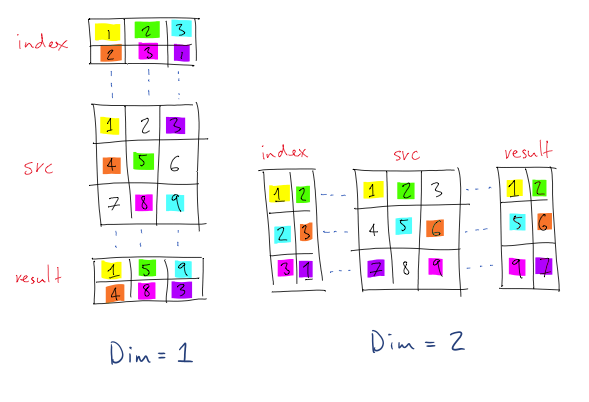

image taken from https://stackoverflow.com/questions/50999977/what-does-the-gather-function-do-in-pytorch-in-layman-terms

## Indexing

In [28]:
TENSOR_INDX = torch.rand((3,254,254))
TENSOR_INDX[0][1][1] # number at (1,1) from first 254x254 matrix
TENSOR_INDX[:2][1][-1] # last row from second 254x254 matrix
TENSOR_INDX[-1][:,0] # third column first row

tensor([0.3648, 0.1055, 0.2983, 0.8342, 0.3445, 0.0557, 0.9298, 0.1697, 0.8013,
        0.3619, 0.7559, 0.3214, 0.6681, 0.1551, 0.6399, 0.3350, 0.8325, 0.7511,
        0.2017, 0.2575, 0.2724, 0.7416, 0.4556, 0.6759, 0.4413, 0.5112, 0.4199,
        0.0585, 0.9759, 0.1274, 0.4255, 0.2054, 0.9632, 0.1291, 0.9403, 0.3774,
        0.9333, 0.9728, 0.5812, 0.3713, 0.9533, 0.2150, 0.4240, 0.8378, 0.7302,
        0.9323, 0.7202, 0.5803, 0.2505, 0.3444, 0.5873, 0.9913, 0.6307, 0.4514,
        0.6923, 0.2623, 0.5324, 0.6662, 0.6416, 0.4011, 0.9788, 0.6253, 0.1785,
        0.0223, 0.0691, 0.1333, 0.7083, 0.4452, 0.7867, 0.9815, 0.9128, 0.1863,
        0.8226, 0.6935, 0.8008, 0.1019, 0.9294, 0.3980, 0.5122, 0.8380, 0.6743,
        0.0783, 0.8885, 0.1885, 0.8661, 0.1114, 0.3414, 0.6770, 0.2039, 0.0671,
        0.2293, 0.6240, 0.3293, 0.5399, 0.7652, 0.4059, 0.2720, 0.8408, 0.7674,
        0.6273, 0.3746, 0.3693, 0.6311, 0.6866, 0.9694, 0.2458, 0.2831, 0.6969,
        0.7177, 0.4032, 0.3271, 0.8581, 